# Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [106]:
X.isna().sum()

client_id                      0
first_issue_date               0
first_redeem_date              0
age                            0
gender                         0
netto                          0
heavy_flg                      0
product_quantity_avg           0
regular_points_received        0
express_points_received        0
regular_points_spent           0
express_points_spent           0
balance                        0
balance_express                0
balance_all                    0
one_time_only                  0
last_month_purchase_sum        0
last_month_quant               0
purchase_sum_diff          51751
quant_diff                 51751
purchase_sum               62006
quant                      62006
purchase_sum_year          62006
quant_year                 62006
number_of_transactions         0
own_trademark_share           32
alchohol_share                32
max_bill                       0
dtype: int64

In [107]:
purch = pd.read_csv('data/purchases.csv')
clients = pd.read_csv('data/clients.csv')
prod = pd.read_csv('data/products.csv')

In [108]:
purch.head()

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN


In [109]:
clients.head()

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U


In [110]:
prod.head()

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.400,0,0
1,0003870676,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.680,0,0
2,0003ceaf69,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.500,0,0
3,000701e093,ec62ce61e3,4202626fcb,88a515c084,48cf3d488f,172.0,54a90fe769,03c2d70bad,0.112,0,0
4,0007149564,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,63417fe1f3,f329130198,0.600,0,0


# Шум и Nan

In [111]:
prod.isna().sum()

product_id             0
level_1                3
level_2                3
level_3                3
level_4                3
segment_id          1572
brand_id            5200
vendor_id             34
netto                  3
is_own_trademark       0
is_alcohol             0
dtype: int64

/home/pfedorov/env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pfedorov/env/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


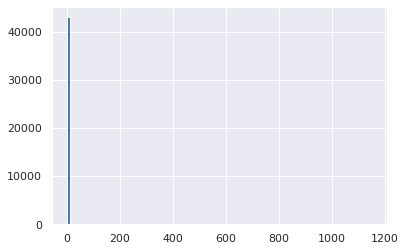

In [112]:
plt.hist(prod.netto, bins = 100)
plt.show()

In [113]:
sorted(prod.netto, reverse=True)[:20]

[1150.0,
 600.0,
 600.0,
 430.0,
 400.0,
 350.0,
 316.8,
 316.8,
 259.2,
 259.2,
 130.0,
 80.0,
 57.6,
 54.6,
 24.0,
 20.0,
 18.9,
 18.9,
 12.0,
 10.0]

In [114]:
netto_mean =  np.nanmean(prod.loc[prod.netto < 50, 'netto'])
prod.loc[prod.netto > 50, 'netto'] = netto_mean
prod.netto = prod.netto.fillna(netto_mean)
prod.is_own_trademark = prod.is_own_trademark.fillna(0)
prod.is_alcohol = prod.is_alcohol.fillna(0)

In [115]:
prod.loc[prod.level_1.isna(), :]

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
796,04d86b4b50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.414786,0,0
12219,48cc0e256d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.414786,0,0
17818,6a3d708544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.414786,0,0


In [116]:
prod.brand_id.value_counts()

0d6f137fb6    4344
4da2dc345f    3071
b06ace74de     385
ab230258e9     268
63ba6b7a61     136
              ... 
b3c69244e4       1
2ffbe457d7       1
2376c93ab8       1
49427810e9       1
8e9ea6b770       1
Name: brand_id, Length: 4296, dtype: int64

In [117]:
prod.brand_id = prod.brand_id.fillna('0d6f137fb6')

In [118]:
prod.vendor_id.value_counts()

43acd80c1a    1514
63243765ed     349
c4e167b91e     331
83f98e6dc3     328
4f276b13c1     323
              ... 
54a352c3d3       1
e54c4c0130       1
f52b080a19       1
1f9018aa69       1
d2c603558c       1
Name: vendor_id, Length: 3193, dtype: int64

In [119]:
prod.vendor_id = prod.vendor_id.fillna('43acd80c1a')

In [120]:
prod.segment_id.value_counts()

105.0    5360
150.0    2745
271.0    1690
259.0    1523
85.0     1291
         ... 
23.0       10
211.0       7
171.0       6
258.0       3
144.0       3
Name: segment_id, Length: 116, dtype: int64

In [121]:
prod.segment_id = prod.segment_id.fillna(105)

In [122]:
prod.level_1.value_counts()

e344ab2e71    22183
c3d3a8e8c6    16573
ec62ce61e3     4279
Name: level_1, dtype: int64

In [123]:
prod.level_1 = prod.level_1.fillna('e344ab2e71')

In [124]:
prod.level_2.value_counts().head()

52f13dac0c    8891
ad2b2e17d2    6631
f2333c90fb    3310
ed2ad1797c    3257
703f4b6eb0    2396
Name: level_2, dtype: int64

In [125]:
prod.level_2 = prod.level_2.fillna('52f13dac0c')

In [126]:
prod.level_3.value_counts().head()

ca69ed9de2    3737
419bc5b424    2729
0f84eb7480    2571
38816369ce    2324
6b55683dad    1862
Name: level_3, dtype: int64

In [127]:
prod.level_3 = prod.level_3.fillna('ca69ed9de2')

In [128]:
prod.level_4.value_counts().head()

420c3b3f0b    2500
4d4b7e1f16    2077
3a074a6620    1485
6dc544533f    1313
b4b0e4c470     784
Name: level_4, dtype: int64

In [129]:
prod.level_4 = prod.level_4.fillna('420c3b3f0b')

In [130]:
prod.isna().sum()

product_id          0
level_1             0
level_2             0
level_3             0
level_4             0
segment_id          0
brand_id            0
vendor_id           0
netto               0
is_own_trademark    0
is_alcohol          0
dtype: int64

In [131]:
clients.isna().sum()

client_id                0
first_issue_date         0
first_redeem_date    35469
age                      0
gender                   0
dtype: int64

In [132]:
clients.first_redeem_date = clients.first_redeem_date.fillna(0)

In [133]:
clients.first_redeem_date = pd.to_datetime(clients.first_redeem_date)
clients.first_issue_date = pd.to_datetime(clients.first_issue_date)

In [134]:
mean_age = np.nanmean(clients.age)
clients.loc[(clients.age > 95) | (clients.age <13)] = mean_age

In [135]:
purch.isna().sum()

client_id                         0
transaction_id                    0
transaction_datetime              0
regular_points_received           0
express_points_received           0
regular_points_spent              0
express_points_spent              0
purchase_sum                      0
store_id                          0
product_id                        0
product_quantity                  0
trn_sum_from_iss                  0
trn_sum_from_red           42743212
dtype: int64

In [136]:
purch.loc[(purch.trn_sum_from_iss.isna())]

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red


In [137]:
# purch.drop(984346,	inplace=True)

In [138]:
purch.loc[purch.trn_sum_from_red.isna(), 'trn_sum_from_red'] = purch.loc[purch.trn_sum_from_red.isna(), 'trn_sum_from_iss']

In [139]:
X = clients
X.head()

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F
2,000048b7a6,2018-12-15 13:33:11,1970-01-01 00:00:00,68.0,F
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60.0,F
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67.0,U


# Вес покупок

In [140]:
tmp = purch
tmp.loc[:, 'netto'] = tmp.loc[:, 'product_id']

In [141]:
rename_dict = pd.DataFrame(data=prod[['netto', 'product_id']])
tmp = tmp.merge(rename_dict, on='product_id', how='left')

In [142]:
tmp['netto'] = tmp['netto_y']
tmp.drop(columns=['netto_x', 'netto_y'], inplace=True)

In [143]:
tmp.netto= tmp.netto.astype('float')

In [144]:
tmp = tmp.groupby(['client_id', 'transaction_id'], as_index=False).sum()
tmp = tmp.groupby(['client_id'], as_index=False).median()

In [145]:
tmp.loc[:, 'heavy_flg'] = 1
tmp.loc[tmp['netto'] > 9.0, 'heavy_flg'] = 0
tmp

,client_id,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,product_quantity,trn_sum_from_iss,trn_sum_from_red,netto,heavy_flg
0,000012768d,95.35,0.0,0.0,0.0,9581.0,13.5,689.5,689.5,7.0235,1
1,000036f903,5.60,0.0,0.0,0.0,1177.5,4.5,266.5,266.5,2.5250,1
2,000048b7a6,18.30,0.0,0.0,0.0,2892.5,12.5,401.0,401.0,1.0830,1
3,000073194a,6.90,0.0,0.0,0.0,958.0,4.0,480.0,480.0,1.7900,1
4,00007c7133,16.20,0.0,0.0,0.0,3857.0,8.0,381.0,552.0,3.7410,1
...,...,...,...,...,...,...,...,...,...,...,...
400157,fffece623e,4.20,0.0,0.0,0.0,873.5,4.0,199.5,199.5,2.7825,1
400158,ffff3dfff8,9.20,0.0,0.0,0.0,1088.0,4.0,290.0,290.0,1.6760,1
400159,ffffaab9da,58.50,0.0,0.0,0.0,5904.0,14.0,659.0,659.0,2.3250,1
400160,ffffeb5619,224.40,0.0,0.0,0.0,27250.9,14.0,2191.0,2191.0,4.5920,1


In [146]:
tmp = tmp.loc[:, ['netto', 'heavy_flg']]

In [147]:
tmp['client_id'] = X.client_id

In [148]:
X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)

# Время покупки

In [149]:
# purch.transaction_datetime = pd.to_datetime(purch.transaction_datetime)

In [150]:
tmp = purch.groupby(['client_id', 'transaction_id', 'transaction_datetime'], as_index=False).mean()[['client_id', 'transaction_id', 'transaction_datetime']]
tmp.loc[:,'day_of_week'] = tmp.loc[:,'transaction_datetime'].dt.weekday
tmp.loc[:,'hour'] = tmp.loc[:,'transaction_datetime'].dt.hour

In [151]:
tmp.loc[(tmp['hour'] >= 0) & (tmp['hour'] <= 3), 'hour'] = 1
tmp.loc[(tmp['hour'] >= 4) & (tmp['hour'] <= 6), 'hour'] = 2
tmp.loc[(tmp['hour'] >= 5) & (tmp['hour'] <= 9), 'hour'] = 3
tmp.loc[(tmp['hour'] >= 10) & (tmp['hour'] <= 12), 'hour'] = 4
tmp.loc[(tmp['hour'] >= 13) & (tmp['hour'] <= 16), 'hour'] = 5
tmp.loc[(tmp['hour'] >= 17) & (tmp['hour'] <= 20), 'hour'] = 6
tmp.loc[(tmp['hour'] >= 21) & (tmp['hour'] <= 24), 'hour'] = 7

In [153]:
tmp

,client_id,transaction_id,transaction_datetime,day_of_week,hour
0,000012768d,6a0e96d0bc,2019-03-08 10:12:03,4,4
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,5,3
2,000012768d,b34f23306e,2019-03-14 15:01:47,3,5
3,000012768d,c1ca85d462,2018-12-16 08:56:01,6,3
4,000036f903,0a3d640bf4,2018-12-21 11:08:58,4,4
...,...,...,...,...,...
8045224,fffff6ce77,e9182e5887,2019-01-19 12:27:26,5,4
8045225,fffff6ce77,eba2694c0c,2019-02-28 12:56:31,3,4
8045226,fffff6ce77,f0af5bcc0b,2019-02-03 06:48:27,6,2
8045227,fffff6ce77,f58417b669,2019-01-16 14:57:39,2,5


In [156]:
tmp.groupby('client_id', as_index=False).agg().value_counts().index[0]
# X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)
# X.head()

TypeError: Must provide 'func' or tuples of '(column, aggfunc).

# Кол-во продуктов в среднем


In [157]:
tmp = purch.loc[:,['client_id','transaction_id', 'product_quantity']]
tmp = tmp.groupby(['client_id','transaction_id'], as_index=False).sum()

In [158]:
tmp = tmp.groupby(['client_id'], as_index=False).mean()
tmp['product_quantity_avg'] = tmp.product_quantity
tmp = tmp.drop(columns='product_quantity')

In [159]:
X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)
X.head()

,client_id,first_issue_date,first_redeem_date,age,gender,netto,heavy_flg,product_quantity_avg
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U,7.0235,1,13.500000
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F,2.5250,1,5.281250
2,000048b7a6,2018-12-15 13:33:11,1970-01-01 00:00:00,68.0,F,1.0830,1,11.375000
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60.0,F,1.7900,1,7.470588
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67.0,U,3.7410,1,7.545455


# Бонусы


In [160]:
bonuses = purch.loc[:,['client_id', 'transaction_id', 'regular_points_received','express_points_received','regular_points_spent', 'express_points_spent']]

In [161]:
tmp = bonuses.groupby(['client_id', 'transaction_id'], as_index=False).mean()
tmp = tmp.groupby(['client_id'], as_index=False).sum()
tmp.loc[:,'balance'] = tmp.loc[:,'regular_points_received'] + tmp.loc[:,'regular_points_spent']
tmp

,client_id,regular_points_received,express_points_received,regular_points_spent,express_points_spent,balance
0,000012768d,25.7,0.0,0.0,0.0,25.7
1,000036f903,54.9,60.0,0.0,0.0,54.9
2,000048b7a6,26.5,0.0,0.0,0.0,26.5
3,000073194a,74.9,0.0,-96.0,0.0,-21.1
4,00007c7133,56.6,0.0,-240.0,0.0,-183.4
...,...,...,...,...,...,...
400157,fffece623e,38.4,0.0,-68.0,0.0,-29.6
400158,ffff3dfff8,117.9,0.0,-182.0,0.0,-64.1
400159,ffffaab9da,34.0,0.0,-6.0,0.0,28.0
400160,ffffeb5619,117.5,0.0,0.0,0.0,117.5


In [162]:
tmp['balance_express'] = tmp.loc[:,'express_points_received'] + tmp.loc[:,'express_points_spent']

In [163]:
tmp['balance_all'] = tmp.loc[:,'express_points_received'] + tmp.loc[:,'express_points_spent'] + tmp.loc[:,'regular_points_received'] + tmp.loc[:,'regular_points_spent']

In [164]:
X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)
X.head()

,client_id,first_issue_date,first_redeem_date,age,gender,netto,heavy_flg,product_quantity_avg,regular_points_received,express_points_received,regular_points_spent,express_points_spent,balance,balance_express,balance_all
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U,7.0235,1,13.500000,25.7,0.0,0.0,0.0,25.7,0.0,25.7
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F,2.5250,1,5.281250,54.9,60.0,0.0,0.0,54.9,60.0,114.9
2,000048b7a6,2018-12-15 13:33:11,1970-01-01 00:00:00,68.0,F,1.0830,1,11.375000,26.5,0.0,0.0,0.0,26.5,0.0,26.5
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60.0,F,1.7900,1,7.470588,74.9,0.0,-96.0,0.0,-21.1,0.0,-21.1
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67.0,U,3.7410,1,7.545455,56.6,0.0,-240.0,0.0,-183.4,0.0,-183.4


# Среднее время между покупками

In [165]:
tmp = purch.loc[:, ['client_id', 'transaction_id']]
tmp.loc[:,'quant'] = 1
tmp = tmp.groupby(['client_id', 'transaction_id'], as_index=False).mean()
tmp = tmp.groupby(['client_id'], as_index=False).sum()
tmp.loc[:, 'one_time_only'] = 0
tmp.loc[tmp.quant == 1, 'one_time_only'] = 1
tmp = tmp.drop(columns='quant')
X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)
X.head()

,client_id,first_issue_date,first_redeem_date,age,gender,netto,heavy_flg,product_quantity_avg,regular_points_received,express_points_received,regular_points_spent,express_points_spent,balance,balance_express,balance_all,one_time_only
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U,7.0235,1,13.500000,25.7,0.0,0.0,0.0,25.7,0.0,25.7,0
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F,2.5250,1,5.281250,54.9,60.0,0.0,0.0,54.9,60.0,114.9,0
2,000048b7a6,2018-12-15 13:33:11,1970-01-01 00:00:00,68.0,F,1.0830,1,11.375000,26.5,0.0,0.0,0.0,26.5,0.0,26.5,0
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60.0,F,1.7900,1,7.470588,74.9,0.0,-96.0,0.0,-21.1,0.0,-21.1,0
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67.0,U,3.7410,1,7.545455,56.6,0.0,-240.0,0.0,-183.4,0.0,-183.4,0


In [166]:
purch.transaction_datetime = pd.to_datetime(purch.transaction_datetime)
tmp = purch.loc[:,['client_id', 'transaction_id', 'transaction_datetime']]
tmp.loc[:,'day_of_week'] = tmp.loc[:,'transaction_datetime'].dt.weekday
tmp.loc[:,'hour'] = tmp.loc[:,'transaction_datetime'].dt.hour
tmp = tmp.groupby(['client_id', 'transaction_id', 'transaction_datetime'], as_index=False).mean()
tmp.loc[:,'date'] = tmp.loc[:,'transaction_datetime'].dt.date

In [167]:
tmp.loc[:,'quantity'] = 1

In [168]:
tmp.transaction_datetime.max()

Timestamp('2019-03-18 23:40:03')

# Потрачено денег и количество товаров за последний месяц

In [169]:
tmp = purch.loc[:, ['client_id','transaction_datetime', 'purchase_sum']]
tmp.loc[:,'quant'] = 1
tmp = tmp.groupby(['client_id','transaction_datetime'], as_index=False).mean()
tmp = tmp.groupby(['client_id','transaction_datetime'], as_index=False).sum()
tmp = tmp.loc[tmp.transaction_datetime > '2019-02-18']
tmp = tmp.groupby(['client_id'], as_index=False).sum()
tmp['last_month_purchase_sum'] = tmp.purchase_sum
tmp['last_month_quant'] = tmp.quant

In [170]:
tmp2 = tmp.loc[:,['client_id', 'last_month_purchase_sum', 'last_month_quant']]
X = pd.concat([X, tmp2.drop(columns='client_id').reindex(X.index)], axis=1)
X.head()

,client_id,first_issue_date,first_redeem_date,age,gender,netto,heavy_flg,product_quantity_avg,regular_points_received,express_points_received,regular_points_spent,express_points_spent,balance,balance_express,balance_all,one_time_only,last_month_purchase_sum,last_month_quant
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U,7.0235,1,13.500000,25.7,0.0,0.0,0.0,25.7,0.0,25.7,0,1222.0,2
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F,2.5250,1,5.281250,54.9,60.0,0.0,0.0,54.9,60.0,114.9,0,2784.0,8
2,000048b7a6,2018-12-15 13:33:11,1970-01-01 00:00:00,68.0,F,1.0830,1,11.375000,26.5,0.0,0.0,0.0,26.5,0.0,26.5,0,342.0,1
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60.0,F,1.7900,1,7.470588,74.9,0.0,-96.0,0.0,-21.1,0.0,-21.1,0,3393.3,6
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67.0,U,3.7410,1,7.545455,56.6,0.0,-240.0,0.0,-183.4,0.0,-183.4,0,380.0,1


# Cравнение с предыдущим месяцем

In [171]:
tmp2 = purch.loc[:, ['client_id','transaction_datetime', 'purchase_sum']]
tmp2.loc[:,'quant'] = 1
tmp2 = tmp2.groupby(['client_id','transaction_datetime'], as_index=False).mean()
tmp2 = tmp2.groupby(['client_id','transaction_datetime'], as_index=False).sum()
tmp2 = tmp2.loc[(tmp2.transaction_datetime > '2019-01-18') & (tmp2.transaction_datetime <= '2019-02-18')]
tmp2 = tmp2.groupby(['client_id'], as_index=False).sum()
tmp2.head()

,client_id,purchase_sum,quant
0,000036f903,2582.00,10
1,000048b7a6,2227.00,4
2,000073194a,2427.07,4
3,00007c7133,1420.84,2
4,00007f9014,1405.03,6


In [172]:
tmp['purchase_sum_diff'] = tmp.loc[:, 'purchase_sum'] - tmp2.loc[:, 'purchase_sum']
tmp['quant_diff'] = tmp.loc[:, 'quant'] - tmp2.loc[:, 'quant']

In [173]:
tmp = tmp.loc[:,['client_id', 'purchase_sum_diff', 'quant_diff']]
X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)
X.head()

,client_id,first_issue_date,first_redeem_date,age,gender,netto,heavy_flg,product_quantity_avg,regular_points_received,express_points_received,regular_points_spent,express_points_spent,balance,balance_express,balance_all,one_time_only,last_month_purchase_sum,last_month_quant,purchase_sum_diff,quant_diff
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U,7.0235,1,13.500000,25.7,0.0,0.0,0.0,25.7,0.0,25.7,0,1222.0,2,-1360.00,-8.0
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F,2.5250,1,5.281250,54.9,60.0,0.0,0.0,54.9,60.0,114.9,0,2784.0,8,557.00,4.0
2,000048b7a6,2018-12-15 13:33:11,1970-01-01 00:00:00,68.0,F,1.0830,1,11.375000,26.5,0.0,0.0,0.0,26.5,0.0,26.5,0,342.0,1,-2085.07,-3.0
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60.0,F,1.7900,1,7.470588,74.9,0.0,-96.0,0.0,-21.1,0.0,-21.1,0,3393.3,6,1972.46,4.0
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67.0,U,3.7410,1,7.545455,56.6,0.0,-240.0,0.0,-183.4,0.0,-183.4,0,380.0,1,-1025.03,-5.0


# Статистика за год 

In [174]:
tmp = purch.loc[:, ['client_id','transaction_datetime', 'purchase_sum']]
tmp.loc[:,'quant'] = 1
tmp = tmp.loc[(tmp.transaction_datetime > '2018-01-01') & (tmp.transaction_datetime <= '2019-01-01')]

In [175]:
tmp = tmp.groupby(['client_id'], as_index=False).sum()
tmp['purchase_sum_year'] = tmp.purchase_sum
tmp['quant_year'] = tmp.quant
X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)
X.head()

,client_id,first_issue_date,first_redeem_date,age,gender,netto,heavy_flg,product_quantity_avg,regular_points_received,express_points_received,...,balance_all,one_time_only,last_month_purchase_sum,last_month_quant,purchase_sum_diff,quant_diff,purchase_sum,quant,purchase_sum_year,quant_year
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U,7.0235,1,13.500000,25.7,0.0,...,25.7,0,1222.0,2,-1360.00,-8.0,25447.00,30.0,25447.00,30.0
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F,2.5250,1,5.281250,54.9,60.0,...,114.9,0,2784.0,8,557.00,4.0,22399.00,57.0,22399.00,57.0
2,000048b7a6,2018-12-15 13:33:11,1970-01-01 00:00:00,68.0,F,1.0830,1,11.375000,26.5,0.0,...,26.5,0,342.0,1,-2085.07,-3.0,4005.00,9.0,4005.00,9.0
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60.0,F,1.7900,1,7.470588,74.9,0.0,...,-21.1,0,3393.3,6,1972.46,4.0,2695.48,9.0,2695.48,9.0
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67.0,U,3.7410,1,7.545455,56.6,0.0,...,-183.4,0,380.0,1,-1025.03,-5.0,30095.00,46.0,30095.00,46.0


# Кол-во покупок за всю  историю

In [176]:
tmp = purch.loc[:, ['client_id', 'transaction_id', 'purchase_sum']]

tmp = tmp.groupby(['client_id', 'transaction_id'], as_index=False).sum()
tmp = tmp.drop(columns=['purchase_sum', 'transaction_id'])
tmp['number_of_transactions'] = 1
tmp = tmp.groupby('client_id', as_index=False).count()
X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)
X.head()

,client_id,first_issue_date,first_redeem_date,age,gender,netto,heavy_flg,product_quantity_avg,regular_points_received,express_points_received,...,one_time_only,last_month_purchase_sum,last_month_quant,purchase_sum_diff,quant_diff,purchase_sum,quant,purchase_sum_year,quant_year,number_of_transactions
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U,7.0235,1,13.500000,25.7,0.0,...,0,1222.0,2,-1360.00,-8.0,25447.00,30.0,25447.00,30.0,4
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F,2.5250,1,5.281250,54.9,60.0,...,0,2784.0,8,557.00,4.0,22399.00,57.0,22399.00,57.0,32
2,000048b7a6,2018-12-15 13:33:11,1970-01-01 00:00:00,68.0,F,1.0830,1,11.375000,26.5,0.0,...,0,342.0,1,-2085.07,-3.0,4005.00,9.0,4005.00,9.0,8
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60.0,F,1.7900,1,7.470588,74.9,0.0,...,0,3393.3,6,1972.46,4.0,2695.48,9.0,2695.48,9.0,17
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67.0,U,3.7410,1,7.545455,56.6,0.0,...,0,380.0,1,-1025.03,-5.0,30095.00,46.0,30095.00,46.0,11


# Привязанность к фирменной продукции и алкоголю

In [177]:
trademark = prod.loc[:, ['product_id', 'is_own_trademark']]
purch = purch.join(trademark.set_index('product_id'), on='product_id')

In [178]:
alcho = prod.loc[:, ['product_id', 'is_alcohol']]
purch = purch.join(alcho.set_index('product_aid'), on='product_id')

In [179]:
tmp = purch.loc[:, ['client_id','transaction_id', 'product_quantity', 'is_own_trademark', 'is_alcohol']]
tmp = tmp.fillna(0)
tmp.is_own_trademark = tmp.is_own_trademark.mul(tmp.product_quantity)
tmp.is_alcohol = tmp.is_alcohol.mul(tmp.product_quantity)
tmp = tmp.groupby(['client_id','transaction_id'], as_index=False).sum()
tmp['own_trademark_share'] = tmp.is_own_trademark.div(tmp.product_quantity)
tmp['alchohol_share'] = tmp.is_alcohol.div(tmp.product_quantity)
tmp = tmp.groupby('client_id', as_index=False).mean()
tmp = tmp.drop(columns=['product_quantity','is_own_trademark', 'is_alcohol'])
X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)
X.head()

,client_id,first_issue_date,first_redeem_date,age,gender,netto,heavy_flg,product_quantity_avg,regular_points_received,express_points_received,...,last_month_quant,purchase_sum_diff,quant_diff,purchase_sum,quant,purchase_sum_year,quant_year,number_of_transactions,own_trademark_share,alchohol_share
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U,7.0235,1,13.500000,25.7,0.0,...,2,-1360.00,-8.0,25447.00,30.0,25447.00,30.0,4,0.060897,0.000000
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F,2.5250,1,5.281250,54.9,60.0,...,8,557.00,4.0,22399.00,57.0,22399.00,57.0,32,0.093006,0.005208
2,000048b7a6,2018-12-15 13:33:11,1970-01-01 00:00:00,68.0,F,1.0830,1,11.375000,26.5,0.0,...,1,-2085.07,-3.0,4005.00,9.0,4005.00,9.0,8,0.025210,0.000000
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60.0,F,1.7900,1,7.470588,74.9,0.0,...,6,1972.46,4.0,2695.48,9.0,2695.48,9.0,17,0.017349,0.261630
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67.0,U,3.7410,1,7.545455,56.6,0.0,...,1,-1025.03,-5.0,30095.00,46.0,30095.00,46.0,11,0.132576,0.000000


# Максимальный чек

In [180]:
tmp = purch.loc[:,['client_id', 'transaction_id', 'purchase_sum']]
tmp = tmp.groupby('client_id', as_index=False).max()
tmp['max_bill'] = tmp.purchase_sum
tmp = tmp.drop(columns=['transaction_id', 'purchase_sum'])
X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)
X.head()

,client_id,first_issue_date,first_redeem_date,age,gender,netto,heavy_flg,product_quantity_avg,regular_points_received,express_points_received,...,purchase_sum_diff,quant_diff,purchase_sum,quant,purchase_sum_year,quant_year,number_of_transactions,own_trademark_share,alchohol_share,max_bill
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U,7.0235,1,13.500000,25.7,0.0,...,-1360.00,-8.0,25447.00,30.0,25447.00,30.0,4,0.060897,0.000000,1007.00
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F,2.5250,1,5.281250,54.9,60.0,...,557.00,4.0,22399.00,57.0,22399.00,57.0,32,0.093006,0.005208,700.00
2,000048b7a6,2018-12-15 13:33:11,1970-01-01 00:00:00,68.0,F,1.0830,1,11.375000,26.5,0.0,...,-2085.07,-3.0,4005.00,9.0,4005.00,9.0,8,0.025210,0.000000,1204.00
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60.0,F,1.7900,1,7.470588,74.9,0.0,...,1972.46,4.0,2695.48,9.0,2695.48,9.0,17,0.017349,0.261630,1728.75
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67.0,U,3.7410,1,7.545455,56.6,0.0,...,-1025.03,-5.0,30095.00,46.0,30095.00,46.0,11,0.132576,0.000000,1043.84


In [185]:
X.isna().sum()

client_id                      0
first_issue_date               0
first_redeem_date              0
age                            0
gender                         0
netto                          0
heavy_flg                      0
product_quantity_avg           0
regular_points_received        0
express_points_received        0
regular_points_spent           0
express_points_spent           0
balance                        0
balance_express                0
balance_all                    0
one_time_only                  0
last_month_purchase_sum        0
last_month_quant               0
purchase_sum_diff          51751
quant_diff                 51751
purchase_sum               62006
quant                      62006
purchase_sum_year          62006
quant_year                 62006
number_of_transactions         0
own_trademark_share           32
alchohol_share                32
max_bill                       0
dtype: int64

In [181]:
X.to_csv('features2401-3.csv')

In [182]:
pd.to_pickle((X), 'features2401-2.pkl')

In [98]:
df = pd.read_csv('features2401.csv')

# K-means




In [96]:
tmp = X

In [97]:
cat_features = ['gender']
cat_inds = []
for col in cat_features:
    name = tmp.columns.get_loc(col)
    cat_inds.append(name)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_features:
    tmp[col] = le.fit_transform(tmp[col])
    tmp[col] = tmp[col].astype(np.int)

from sklearn.preprocessing import OneHotEncoder

tmp = pd.get_dummies(tmp, columns=['gender'])

TypeError: argument must be a string or number

In [ ]:
from sklearn.cluster import KMeans

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train.drop(columns='client_id'))
# df['cluster'] = kmeans.predict(df)
# df = order_cluster('cluster', 'purchase_sum',df,True)

In [ ]:
tmp['cluster_new'] = kmeans.predict(X.drop(columns='client_id'))
tmp = tmp.loc[:, ['client_id', 'cluster_new']]

In [ ]:
X = pd.concat([X, tmp.drop(columns='client_id').reindex(X.index)], axis=1)
X.head()

# Функция для Log Transform



Работает только для положительных

In [ ]:
def log_transform(data, col):
    data[col] = (data[col]+1).transform(np.log)

Для отрицательных

In [ ]:
def log_transform(data, col):
    data[col] = (data[col]-data[col].min()+1) .transform(np.log)